In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
def trapezoid_method(a,b,N,f):
    Nint = int(N)
    xvals = np.linspace(a,b,Nint+1)
    fvals = f(xvals)
    dx = (b-a)/N
    return dx/2.*(fvals[0] + fvals[Nint] + 2.*np.sum(fvals[1:Nint])) 

In [3]:
def secant_method(a,b,N,f):
    Nint = int(N)
    TNint = 2*N
    xvals = np.linspace(a,b,TNint+1)
    fvals = f(xvals)
    dx = (b-a)/(2.*N)
    return dx/3.*(fvals[0] + fvals[TNint] + 2.*np.sum(fvals[2:TNint-1:2]) + 4.*np.sum(fvals[1:TNint:2])) 

**Problem 1**: (2pts for each part) When we write 
    
` 
xvals = np.linspace(a,b,int(n)+1)
`

we are generating a sequence of points $x_{j}$ such that 

$$
\mbox{xvals[j]} = x_{j}, ~ x_{j} = a + j\delta x, ~ \delta x = \frac{b-a}{n}, ~ j=0,\cdots,n.
$$

Thus, if I wanted to generate a sequence of points between $a=1$ and $b=9$ with spacing $\delta x=.25$, then I would find 

$$
.25 = \frac{9-1}{n}
$$

so that $n = 32$.  I could then generate these points via the code

`
xvals = np.linspace(1.,9.,32 + 1)
`

Using the model, write the code which will generate

1a) A sequence of points between $a=0$ and $b=10$ with spacing $\delta x = 10^{-3}$.

1b) A sequence of points between $a=2$ and $b=18$ with spacing $\delta x = 2^{-m}$, where $m$ is a positive integer that a user would specify.  

1c) From problem 1a, using array slicing, what code would I write to find the points $x_{j}$ such that $1\leq x_{j} \leq 9$?  Your answer should be in the form `xvals[n1:n2]` where `n1` and `n2` are two integers you must find.  

1d) From problem 1b, using array slicing, what code would I write to find the points $x_{j}$ such that $6\leq x_{j} \leq 10$?  Your answer should be in the form `xvals[n1:n2]` where `n1` and `n2` are two integers you must find, though they will be in terms of $m$.    


1(a)
$$
10^{-3} = \frac{(10-0)}{n}\\ 
n10^{-3} = 10\\
n = 10^{4}\\
$$

In [20]:
#1(a)
print(np.linspace(0.,10., int(10**4)+1))

[0.000e+00 1.000e-03 2.000e-03 ... 9.998e+00 9.999e+00 1.000e+01]


1(b)
$$
2^{-m} = \frac{18-2}{n}\\
2^{-m}n = 16\\
n = 16*2^{m}\\
$$

In [21]:
#1(b)
def seqint(m):
    n = 16.*(2.**m)
    return np.linspace(2., 18., int(n)+1)

In [22]:
print(seqint(0)) #spacing of 2^0 = 1
print(seqint(1)) #spacing of 2^-1 = 0.5
print(seqint(2)) #spacing of 2^-2 = 0.25

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5
 16.  16.5 17.  17.5 18. ]
[ 2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75
  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75
  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75
 11.   11.25 11.5  11.75 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75
 14.   14.25 14.5  14.75 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75
 17.   17.25 17.5  17.75 18.  ]


$$
0 + 10^{-3}n1 = 1\\
n1 = \frac{1}{10^{-3}}\\
0 + 10^{-3}n2 = 9 \\
n2 = \frac{9}{10^{-3}}\\
$$

In [23]:
#1(c)
xvals = np.linspace(0.,10., int(1e4)+1) #from 1(a)
dx = 10**-3.
n1 = (1.)/dx
n2 = (9.)/dx
print(xvals[int(n1):int(n2)+1])

[1.    1.001 1.002 ... 8.998 8.999 9.   ]


$$
2+ 2^{-m}n1 = 6\\
2^{-m}n1 = 4\\
n1 = \frac{4}{2^{-m}}\\
$$
and 
$$
2+ 2^{-m}n2 = 10\\
2^{-m}n2 = 8 \\
n2 = \frac{8}{2^{-m}}\\
$$

In [41]:
#1(d)
def seq1d(m):
    n = 16.*(2.**m)
    xvals = np.linspace(2., 18., int(n)+1) 
    dx = 2.**(-m)
    n1 = 4./dx 
    n2 = 8./dx
    return xvals[int(n1): int(n2)+1]

In [47]:
#1(d) testing
print(seq1d(0))
print(seq1d(3))

[ 6.  7.  8.  9. 10.]
[ 6.     6.125  6.25   6.375  6.5    6.625  6.75   6.875  7.     7.125
  7.25   7.375  7.5    7.625  7.75   7.875  8.     8.125  8.25   8.375
  8.5    8.625  8.75   8.875  9.     9.125  9.25   9.375  9.5    9.625
  9.75   9.875 10.   ]


**Problem 2**: (10 pts) A particle of mass $m$ moving through a fluid is subjected to viscous resistance $R(v)$, where $v$ is the particle's velocity.  Suppose that relationship between the resistance $R$, velocity $v$, and the time of travel is given by 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{R(u)} du, 
$$
where $v_{0} = v(0)$ is the intial velocity of the particle.  Now suppose that 
$$
R(v) = -R_{\infty}\left(\frac{2}{1 + e^{-v^2/v_{c}^{2}}}-1\right).
$$
For a particle of mass $m=1 ~kg$ (kilograms), with $v_{0}=10 ~m/s$ (meters/second), and $v_{c} = 2 ~m/s$ and $R_{\infty} = 3 ~kg ~m/s^{2}$, using the Trapezoid Method, find the approximate time necessary for the particle to slow to $v(t) = 5 ~ m/s$.

#(2)Assume 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{R(u)} du
$$
and 
$$
R(v) = -R_{\infty}\left(\frac{2}{1 + e^{-v^2/v_{c}^{2}}}-1\right).
$$
Hence, 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{-R_{\infty}\left(\frac{2}{1 + e^{-u^2/v_{c}^{2}}}-1\right).} du
$$
It is given in the problem that 
For a particle of mass $m=1 ~kg$ (kilograms), with $v_{0}=10 ~m/s$ (meters/second), and $v_{c} = 2 ~m/s$ and $R_{\infty} = 3 ~kg ~m/s^{2}$, using the Trapezoid Method, find the approximate time necessary for the particle to slow to $v(t) = 5 ~ m/s$.

In [162]:
#(2)
m= 1.
v0= 10.
vc= 2.
Rinf = 3.
vt =5.
e = np.exp(1)
def Rv_fun(v):
    frac = (2.)/(1 + (e**((-1.*(v**2.))/(vc**2))))
    bottom = (frac -1)*(-Rinf)
    Rv = (m/bottom)
    return Rv

In [164]:
print("it takes in secononds:", trapezoid_method(v0,vt,100,Rv_fun)) # answer is time in seconds.

it takes in secononds: 1.667148688179324


**Problem 3** (20 pts): In class, we showed that Simpson's method for finding the integral 

$$
T_{[a,b]}(f) = \int_{a}^{b} f(x) dx, 
$$

over a mesh $\left\{ x_{j} \right\}_{j=0}^{2N}$, $x_{j} = a + j\delta x$, $\delta x = (b-a)/(2N)$, is found via a series of local approximations via the formula 

\begin{align*}
\int_{a}^{b} f(x) dx = & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} f(x) dx \\
\approx & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} y_{2l+1}(x;x_{2l+1}) dx 
\end{align*}

where the approximating interpolatory polynomial $y_{2l+1}(x;x_{2l+1})$ is given by 

$$
y_{2l+1}(x;x_{2l+1}) = a_{2l+1}\left(x-x_{2l+1} \right)^{2} + b_{2l+1}\left(x-x_{2l+1} \right) + c_{2l+1}.
$$

The coefficients $a_{2l+1}$, $b_{2l+1}$, and $c_{2l+1}$ are found via the _interpolation_ requirements

\begin{align*}
y_{2l+1}(x_{2l};x_{2l+1}) = & f\left(x_{2l}\right) = f_{2l}\\
y_{2l+1}(x_{2l+1};x_{2l+1}) = & f\left(x_{2l+1}\right) = f_{2l+1}\\
y_{2l+1}(x_{2l+2};x_{2l+1}) = & f\left(x_{2l+2}\right) = f_{2l+2}\\
\end{align*}

* **Part a)** (5 pts) Using the above interpolatory requirements, show that 
$$
a_{2l+1} = \frac{1}{2(\delta x)^{2}}\left(f_{2l} -2f_{2l+1} + f_{2l+2} \right), ~ b_{2l+1} = \frac{1}{2\delta x}\left(f_{2l+2}-f_{2l} \right), ~ c_{2l+1} = f_{2l+1}
$$

* **Part b)** (5 pts) Using the Taylor series expansions
\begin{align*}
f_{2l} = f\left(x_{2l+1}-\delta x\right) = f_{2l+1} - f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} - \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + C_{2l+1}(\delta x)^{4}\\
f_{2l+2} = f\left(x_{2l+1}+\delta x\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} + \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + \bar{C}_{2l+1}(\delta x)^{4}
\end{align*}
show that 
\begin{multline}
y_{2l+1}\left(x;x_{2l+1}\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x-x_{2l+1}\right) + \frac{f''(x_{2l+1})}{2}\left(x-x_{2l+1}\right)^{2} \\
+ \frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right) + \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{2}
\end{multline}

* **Part c)** (5 pts) Using the Taylor series expansion
$$
f(x) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x - x_{2l+1} \right) + \frac{1}{2}f''(x_{2l+1})\left(x - x_{2l+1} \right)^{2} + \frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{3} + \tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{4}
$$
show that 
\begin{align}
\int_{x_{2l}}^{x_{2l+2}} \left(f(x) - y_{2l+1}(x;x_{2l+1}) \right) dx = & \left(\frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right) \right)(\delta x)^{5}\\
= & \hat{C}_{2l+1}\left(\delta x \right)^{5},
\end{align}
where we use the relabeling
$$
\hat{C}_{2l+1} \equiv \frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right)
$$

* **Part d)** (5 pts) Letting the global Simpson's approximation be $A_{2N}(f)$ where
\begin{align}
A_{2N}(f) = & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} y_{2l+1}(x;x_{2l+1}) dx \\
= &\frac{\delta x}{3}\left(f_{0} + f_{2N} + 2\sum_{l=1}^{N-1}f_{2l} + 4\sum_{l=0}^{N-1}f_{2l+1} \right)
\end{align}
show that 
$$
T_{[a,b]}(f) - A_{2N}(f) = \frac{\hat{C}_{M}}{2}(b-a)(\delta x)^{4}
$$
where $\hat{C}_{M}$ is the biggest of all the constants $\hat{C}_{2l+1}$ (Note, technically we should have inequalities throughout all of this, but we are only telling a small fib...)

3(a)
Let 
$$
y_{2l+1}(x;x_{2l+1}) = a_{2l+1}\left(x-x_{2l+1} \right)^{2} + b_{2l+1}\left(x-x_{2l+1} \right) + c_{2l+1}.
$$

The coefficients $a_{2l+1}$, $b_{2l+1}$, and $c_{2l+1}$ are found via the _interpolation_ requirements

\begin{align*}
y_{2l+1}(x_{2l};x_{2l+1}) = & f\left(x_{2l}\right) = f_{2l}\\
y_{2l+1}(x_{2l+1};x_{2l+1}) = & f\left(x_{2l+1}\right) = f_{2l+1}\\
y_{2l+1}(x_{2l+2};x_{2l+1}) = & f\left(x_{2l+2}\right) = f_{2l+2}\\
\end{align*}

So, first we can work with $y_{2l+1}(x_{2l+1};x_{2l+1})$ so, 

$y_{2l+1}(x_{2l+1};x_{2l+1}) = f\left(x_{2l+1}\right) = f_{2l+1} = a_{2l+1}\left(x_{2l+1}-x_{2l+1} \right)^{2} + b_{2l+1}\left(x_{2l+1}-x_{2l+1} \right) + c_{2l+1}
$
Hence, $ c_{2l+1} = f_{2l+1}$
Now, we have 2 equations with 2 unknowns:
$$
f_{2l} = a_{2l+1}\left(x_{2l}-x_{2l+1} \right)^{2} + b_{2l+1}\left(x_{2l}-x_{2l+1} \right) + f_{2l+1}\\
f_{2l+2} =a_{2l+1}\left(x_{2l+2}-x_{2l+1} \right)^{2} + b_{2l+1}\left(x_{2l+2}-x_{2l+1} \right) + f_{2l+1}\\
f_{2l} = a_{2l+1}(-\delta x)^{2} + b_{2l+1}( -\delta x) + f_{2l+1}\\
f_{2l+2} =a_{2l+1}(\delta x)^{2} + b_{2l+1}(\delta x) + f_{2l+1}\\
-f_{2l} + a_{2l+1}(-\delta x)^{2} +f_{2l+1} =  b_{2l+1}( \delta x) \\
f_{2l+2} =a_{2l+1}(\delta x)^{2} + -f_{2l} + a_{2l+1}(-\delta x)^{2} +f_{2l+1}+ f_{2l+1}\\
f_{2l+2} +f_{2l} -2f_{2l+1} = 2a_{2l+1}(\delta x)^{2}\\
a_{2l+1} = \frac{1}{2(\delta x)^{2}}\left(f_{2l} -2f_{2l+1} + f_{2l+2} \right)\\
b_{2l+1}( \delta x)  = -f_{2l} + a_{2l+1}(-\delta x)^{2} +f_{2l+1} = -f_{2l} + (\frac{1}{2(\delta x)^{2}}\left(f_{2l} -2f_{2l+1} + f_{2l+2} \right))(-\delta x)^{2} +f_{2l+1} \\
b_{2l+1} = \frac{1}{2\delta x}\left(f_{2l+2}-f_{2l} \right)\\
$$




3(b) Let 
\begin{align*}
f_{2l} = f\left(x_{2l+1}-\delta x\right) = f_{2l+1} - f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} - \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + C_{2l+1}(\delta x)^{4}\\
f_{2l+2} = f\left(x_{2l+1}+\delta x\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} + \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + \bar{C}_{2l+1}(\delta x)^{4}
\end{align*}

We know from 1(a) that 
$$
y_{2l+1}(x;x_{2l+1}) = a_{2l+1}\left(x-x_{2l+1} \right)^{2} + b_{2l+1}\left(x-x_{2l+1} \right) + c_{2l+1}.\\
a_{2l+1} = \frac{1}{2(\delta x)^{2}}\left(f_{2l} -2f_{2l+1} + f_{2l+2} \right)\\
b_{2l+1} = \frac{1}{2\delta x}\left(f_{2l+2}-f_{2l} \right)\\
c_{2l+1} = f_{2l+1}
$$
So,
$$
y_{2l+1}(x;x_{2l+1}) = (\frac{1}{2(\delta x)^{2}}\left(f_{2l} -2f_{2l+1} + f_{2l+2} \right))\left(x-x_{2l+1} \right)^{2} + (\frac{1}{2\delta x}\left(f_{2l+2}-f_{2l} \right))\left(x-x_{2l+1} \right) + f_{2l+1}.
$$
Now, lets plug in what we know from the given above, 
$$y_{2l+1}(x;x_{2l+1}) = (\frac{1}{2(\delta x)^{2}}\left(f\left(x_{2l+1}-\delta x\right) = f_{2l+1} - f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} - \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + C_{2l+1}(\delta x)^{4} -2f_{2l+1} + f\left(x_{2l+1}+\delta x\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} + \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + \bar{C}_{2l+1}(\delta x)^{4} \right))\left(x-x_{2l+1} \right)^{2} + (\frac{1}{2\delta x}\left(f\left(x_{2l+1}+\delta x\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} + \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + \bar{C}_{2l+1}(\delta x)^{4}-f\left(x_{2l+1}-\delta x\right) = f_{2l+1} - f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} - \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + C_{2l+1}(\delta x)^{4} \right))\left(x-x_{2l+1} \right) + f_{2l+1}.
$$
\begin{multline}
y_{2l+1}\left(x;x_{2l+1}\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x-x_{2l+1}\right) + \frac{f''(x_{2l+1})}{2}\left(x-x_{2l+1}\right)^{2} \\
+ \frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right) + \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{2}
\end{multline}

3(c)
$$
f(x) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x - x_{2l+1} \right) + \frac{1}{2}f''(x_{2l+1})\left(x - x_{2l+1} \right)^{2} + \frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{3} + \tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{4}
$$
So we have, 
$$
f(x) - y_{2l+1}(x;x_{2l+1}) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x - x_{2l+1} \right) + \frac{1}{2}f''(x_{2l+1})\left(x - x_{2l+1} \right)^{2} + \frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{3} + \tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{4} - (f_{2l+1} + f'\left(x_{2l+1}\right)\left(x-x_{2l+1}\right) + \frac{f''(x_{2l+1})}{2}\left(x-x_{2l+1}\right)^{2} \\
+ \frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right) + \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{2})
$$
Then, by simplifying and cancelations we get:
$$
f(x) - y_{2l+1}(x;x_{2l+1}) = \frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{3} + \tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{4} - \frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right) - \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{2})
$$
relabel:
$$
A1 = \frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{3}\\
B1 = \tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{4}\\
C1 = \frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right)\\
D1 = \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{2})\\
$$
Hence, $f(x) - y_{2l+1}(x;x_{2l+1}) = A1+B1-C1-D1$
So, 
$$
\int_{}^{} A1 = 1/4\frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{4} + C1\\
\int_{}^{} B1 = 1/5\tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{5} +C2\\
\int_{}^{} C1 = 1/2\frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right)^{2} +C3\\
\int_{}^{} D1 =1/3\frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{3})+C4
\\
\\
\\
$$
$$
\int_{x_{2l}}^{x_{2l+2}} A1 = 1/4\frac{1}{6}f'''(x_{2l+1})(x_{2l+2}-x_{2l+1})^{4}- 1/4\frac{1}{6}f'''(x_{2l+1})(x_{2l}-x_{2l+1})^{4} = 1/4\frac{1}{6}f'''(x_{2l+1})(\delta x)^{4}- 1/4\frac{1}{6}f'''(x_{2l+1})(\delta x)^{4} = 0.\\
\int_{x_{2l}}^{x_{2l+2}} B1 =1/5\tilde{C}_{2l+1}\left(x_{2l+2}-x_{2l+1}\right)^{5} - 1/5\tilde{C}_{2l+1}\left(x_{2l}-x_{2l+1}\right)^{5} = 2/5\tilde{C}_{2l+1}(\delta x)^{5}\\
\int_{x_{2l}}^{x_{2l+2}} C1 =1/2\frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x_{2l+2}-x_{2l+1}\right)^{2} -1/2\frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x_{2l}-x_{2l+1}\right)^{2} = 0\\
\int_{x_{2l}}^{x_{2l+2}} D1 =1/3\frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x_{2l+2}-x_{2l+1}\right)^{3}) -1/3\frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x_{2l}-x_{2l+1}\right)^{3}) = \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{5}\\
$$

$$
\int_{x_{2l}}^{x_{2l+2}} \left(f(x) - y_{2l+1}(x;x_{2l+1}) \right) dx = \int_{x_{2l}}^{x_{2l+2}} A1 + \int_{x_{2l}}^{x_{2l+2}} B1 - \int_{x_{2l}}^{x_{2l+2}} C1 - \int_{x_{2l}}^{x_{2l+2}} D1
$$
Finally we can conclude that, 
\begin{align}
\int_{x_{2l}}^{x_{2l+2}} \left(f(x) - y_{2l+1}(x;x_{2l+1}) \right) dx = & \left(\frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right) \right)(\delta x)^{5}\\
= & \hat{C}_{2l+1}\left(\delta x \right)^{5},
\end{align}
where we use the relabeling
$$
\hat{C}_{2l+1} \equiv \frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right)
$$


3(d)
$$
T_{[a,b]}(f) - A_{2N}(f) = \sum_{l=0}^{N-1}\int_{x_{2l}}^{x_{2l+2}} \left(f(x) - y_{2l+1}(x;x_{2l+1}) \right) dx
$$
from part c we showed that:
$$
T_{[a,b]}(f) - A_{2N}(f) = \sum_{l=0}^{N-1} \hat{C}_{2l+1}\left(\delta x \right)^{5} = \left(\delta x \right)^{5} \sum_{l=0}^{N-1} \hat{C}_{2l+1} = \hat{C}_{M}\left(\delta x \right)^{5} \sum_{l=0}^{N-1} 1 = \hat{C}_{M}\left(\delta x \right)^{5} N 
$$
where $\hat{C}_{M}$ is the biggest of all the constants $\hat{C}_{2l+1}$ (Note, technically we should have inequalities throughout all of this, but we are only telling a small fib...)
where $\delta x = \frac{b-a}{2N}$.
So,
$ N = \frac{(b-a)}{2\delta x}$
$$
T_{[a,b]}(f) - A_{2N}(f) = \hat{C}_{M}(\delta x)^{5}N= \hat{C}_{M}\frac{b-a}{2}(\delta x)^{4}
$$

**Problem 4** (10 pts): Choose an example and using the code from Lecture 5 as a model, numerically verify the error analysis we performed for Simpson's method above by generating a log/log plot and a corresponding estimate of the slope of the plotted line.  Note, you may have to use clever choices for $N$ or slicing choices in order to remove nan terms and the like from your slope estimates.  Provide a brief summary of your results.  

In [169]:
def test_fun(xvals):
    return xvals**4

In [170]:
def simpson_method(a,b,N,f):
    xvals = np.linspace(a,b,int(N)+1)
    fvals = f(xvals)
    dx = (b-a)/int(N)
    return dx/3.*(fvals[0] + fvals[int(N)] + 2.*np.sum(fvals[2:(int(N)-1):2])+4.*np.sum(fvals[1:int(N):2]))  

In [178]:
def error_test(a,b,f):
    tval =  (b**5.)/5. -(a**5.)/5.
    Nvals = np.array([1e2, 1e3, 1e4])
    Evals = np.zeros(Nvals.size)
    for jj in range(0,Nvals.size):
        Evals[jj] = np.log10(np.abs(tval - simpson_method(a,b,Nvals[jj],f)))
    xvals = np.log10(Nvals)
    plt.plot(xvals,Evals)
    plt.xlabel('$log_{10}|\delta x|$')
    plt.ylabel('$log_{10}|error|$')
    novals = Evals.size
    slopes = Evals[1:] - Evals[:novals-1]
    print(np.min(slopes))
    print(np.max(slopes))
    print(np.mean(slopes))

-4.000033702041067
-3.4980347236870273
-3.7490342128640473


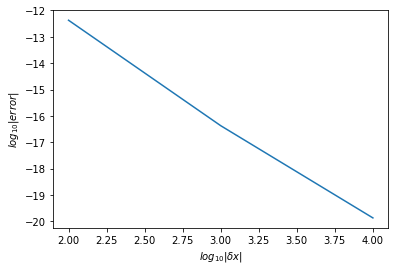

In [179]:
error_test(0.,0.2,test_fun)

In part problem 3 part d,  I showed that 
$$
T_{[a,b]}(f) - A_{2N}(f) = \hat{C}_{M}(\delta x)^{5}N= \hat{C}_{M}\frac{b-a}{2}(\delta x)^{4}
$$
Hence, 
$$
Error = \hat{C}_{M}\frac{b-a}{2}(\delta x)^{4}\\
log_{10}|Error| = log_{10}(\hat{C}_{M}\frac{b-a}{2}(\delta x)^{4})\\
log_{10}|Error| = log_{10}(\hat{C}_{M}\frac{b-a}{2}) + log_{10}(\delta x)^{4}\\
log_{10}|Error| = log_{10}(\hat{C}_{M}\frac{b-a}{2}) + 4*log_{10}(\delta x)
$$
In the graph above, y axis represtents $log_{10}|Error|$ and the x axis is $ log_{10}(\delta x)$ so the slope is 4!